#  Project
### Problem Statement

In the year 2013, a supermarket decided to draw insight from their data in order to make data driven decisions.
As a Data Analyst,you are presented with their 2013 daily sales records (sales_data.csv) and tasked to help them find answers to the questions below by analysing the data.

1. i. What is the average sales and profit per market? 

   ii.Plot a stacked bar chart showing the sales and profit per market.
   
   iii.Which market brings more sales on the average?

2. i. What are the best 10 performing products with regards to sales in 2013?

   ii.What are the least 10 performing products with regards to sales 2013?


3. i. Extract the days and months from the Order Date and add them to the data frame with the name "Days" and "Months" respectively?

   ii.Show the trend of profit from January to December with a line plot.

   iii. Which month does the company make more profit and what 5 products are sold most in that month?
   iv.  which day does the company make high sales on the average?

4. i. By analyzing the data, what is the correlation between sales and discount?

   ii. Use a scatter plot to show the relationship between sales and profit.

5. i. Plot a grouped bar chart showing the total profit for the different product category for each market.
   ii. From your graph, which product category performs well in each market?
   
6. i. Which customer spent the most in the whole year?
   ii. What product does the customer in (i) buy the most?
   iii. Which month did the customer spent the most?
   iv. How much did this customer spend in the whole year?
   
7. Can you do any other analysis to draw more insight? Feel free to do it.


**Thank you**

**GOOD LUCK!**





In [1]:
# Use markdowns to write your answers or findings where necessary.
# Use comments to exlain you codes where necessary 
# Remember to import the necessary packages

### **NB**: To easily load the data, it's advisable you have the data and the notebook file  in the same folder.

In [2]:
#import your packages here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from calendar import month_name as mn

%matplotlib inline

In [3]:
# Load the sales data here
sales = pd.read_csv('sales_data.csv', parse_dates=['Order Date'], index_col=0)

In [4]:
sales

,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.214,7.0,0.1,36.6240
1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.280,7.0,0.0,203.7000
2,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Accessories,"Logitech Memory Card, Erganomic",728.568,8.0,0.1,-32.4720
3,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Dania Library with Doors, Mobile",2189.520,6.0,0.0,372.0600
4,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Traditional",1362.060,7.0,0.0,340.4100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13794,2013-12-31,TU-2013-9400,TM-11490,Tony Molinari,Consumer,Gaziantep,EMEA,EMEA,Furniture,Furnishings,"Eldon Light Bulb, Black",10.080,1.0,0.6,-5.5500
13795,2013-12-31,CA-2013-163951,CJ-11875,Carl Jackson,Corporate,Philadelphia,US,East,Office Supplies,Art,Newell 31,16.520,5.0,0.2,1.6520
13796,2013-12-31,US-2013-111528,JP-16135,Julie Prescott,Home Office,Los Angeles,US,West,Office Supplies,Binders,Cardinal Hold-It CD Pocket,6.384,1.0,0.2,2.1546
13797,2013-12-31,CA-2013-117660,BM-11785,Bryan Mills,Consumer,Columbus,US,East,Office Supplies,Labels,Avery 487,5.904,2.0,0.2,1.9926


### (I) What is the average sales and profit per market?

In [ ]:
# Average Sales Per Market
mean_sales_market = sales.groupby('Market').mean()['Sales']
mean_sales_market

Market
APAC      337.225210
Africa    177.023796
Canada    180.765566
EMEA      156.453122
EU        297.415215
LATAM     198.738815
US        235.842570
Name: Sales, dtype: float64

In [ ]:
# Average Sales Per Profit
mean_sales_prof = sales.groupby('Market').mean()['Profit']
mean_sales_prof

Market
APAC      42.596237
Africa    20.623734
Canada    48.391132
EMEA       8.102479
EU        38.373754
LATAM     20.070383
US        31.677105
Name: Profit, dtype: float64

### (II) Plot a stacked bar chart showing the sales and profit per market.

In [ ]:
# dataframe of sales per market 
avg_prof = mean_sales_market.to_frame()
avg_prof.reset_index(inplace=True)
avg_prof

# dataframe of sales per profit 
avg_sales = mean_sales_prof.to_frame()
avg_sales.reset_index(inplace=True)
avg_sales

# joining them via inner join 
df_cd = pd.merge(avg_sales, avg_prof, how='inner')
df_cd

,Market,Profit,Sales
0,APAC,42.596237,337.225210
1,Africa,20.623734,177.023796
2,Canada,48.391132,180.765566
3,EMEA,8.102479,156.453122
4,EU,38.373754,297.415215
5,LATAM,20.070383,198.738815
6,US,31.677105,235.842570


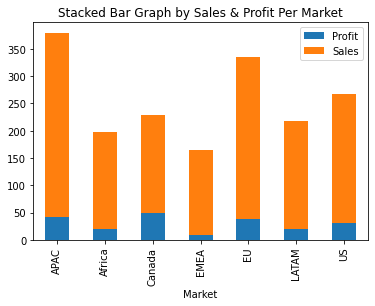

In [ ]:

# plot data in stack manner of bar type
df_cd.plot(x='Market', kind='bar', stacked=True, title='Stacked Bar Graph by Sales & Profit Per Market');

### (III) What are the best 10 performing products with regards to sales in 2013?

In [ ]:
# Filtered Order Date
cond = sales[sales['Order Date'] <= pd.to_datetime('2013-12-31')]

# regarding sales
cond.groupby('Product Name').sum()['Sales']

# condition 
cond2 = cond.groupby('Product Name').sum()['Sales']

# dataframe of sales per product name 
top = cond2.to_frame()
top.reset_index(inplace=True)
top

# top 10 
top_ten=top.groupby(["Product Name"]).sum().sort_values("Sales", ascending=False).head(10)
top_ten

,Sales
Product Name,
"Motorola Smart Phone, Full Size",29357.0982
"Cisco Smart Phone, Full Size",26737.1330
Canon imageCLASS 2200 Advanced Copier,25899.9260
"Harbour Creations Executive Leather Armchair, Adjustable",21871.1296
"Apple Smart Phone, Full Size",21120.4080
"Hon Executive Leather Armchair, Adjustable",20104.6026
"Office Star Executive Leather Armchair, Adjustable",19936.1460
"Nokia Smart Phone, with Caller ID",18568.8543
"Samsung Smart Phone, VoIP",16733.1120


### (IV) What are the least 10 performing products with regards to sales in 2013?

In [ ]:
# top 10 
least_ten=top.groupby(["Product Name"]).sum().sort_values("Sales", ascending=False).tail(10)
least_ten

,Sales
Product Name,
"Crayola Anti Dust Chalk, 12/Pack",2.912
Newell 32,2.880
"Eldon Spacemaker Box, Quick-Snap Lid, Clear",2.672
Acco 3-Hole Punch,2.628
Avery 479,2.610
"Acco Banker's Clasps, 5 3/4""-Long",2.304
Maxell 4.7GB DVD+R 5/Pack,1.980
Avery Durable Binders,1.728
"OIC #2 Pencils, Medium Soft",1.504


### (V) Extract the days and monhts from the Order Date and add them to the data frame with tthe name "Days" and "Months" respectively?

In [ ]:
# Months (by Month)
sales['Months'] = sales['Order Date'].dt.month_name()

# Days 
sales['Days'] = sales['Order Date'].dt.day_name()
sales

,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Months,Days
0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.214,7,0.1,36.6240,January,Tuesday
1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.280,7,0.0,203.7000,January,Tuesday
2,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Accessories,"Logitech Memory Card, Erganomic",728.568,8,0.1,-32.4720,January,Tuesday
3,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Dania Library with Doors, Mobile",2189.520,6,0.0,372.0600,January,Tuesday
4,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Traditional",1362.060,7,0.0,340.4100,January,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13794,2013-12-31,TU-2013-9400,TM-11490,Tony Molinari,Consumer,Gaziantep,EMEA,EMEA,Furniture,Furnishings,"Eldon Light Bulb, Black",10.080,1,0.6,-5.5500,December,Tuesday
13795,2013-12-31,CA-2013-163951,CJ-11875,Carl Jackson,Corporate,Philadelphia,US,East,Office Supplies,Art,Newell 31,16.520,5,0.2,1.6520,December,Tuesday
13796,2013-12-31,US-2013-111528,JP-16135,Julie Prescott,Home Office,Los Angeles,US,West,Office Supplies,Binders,Cardinal Hold-It CD Pocket,6.384,1,0.2,2.1546,December,Tuesday
13797,2013-12-31,CA-2013-117660,BM-11785,Bryan Mills,Consumer,Columbus,US,East,Office Supplies,Labels,Avery 487,5.904,2,0.2,1.9926,December,Tuesday


### (VI) Show the trend of profit from January to December with line plot.

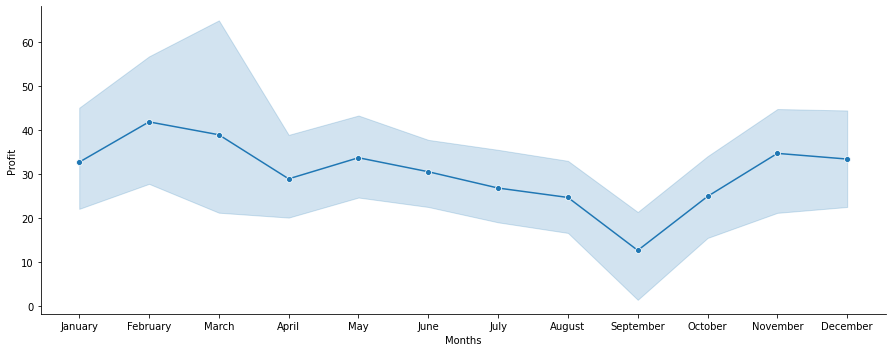

In [ ]:
# month list
months = mn[1:]

# convert the column to categorical and ordered
#correct_omzet.maand = pd.Categorical(correct_omzet.maand, categories=months, ordered=True)

# plot the data
p = sns.relplot(kind='line', data=sales, x='Months', y='Profit', aspect=2.5, marker='o')

In [ ]:
# Checking our datatypes so far
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13799 entries, 0 to 13798
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     13799 non-null  datetime64[ns]
 1   Order ID       13799 non-null  object        
 2   Customer ID    13799 non-null  object        
 3   Customer Name  13799 non-null  object        
 4   Segment        13799 non-null  object        
 5   City           13799 non-null  object        
 6   Market         13799 non-null  object        
 7   Region         13799 non-null  object        
 8   Category       13799 non-null  object        
 9   Sub-Category   13799 non-null  object        
 10  Product Name   13799 non-null  object        
 11  Sales          13799 non-null  float64       
 12  Quantity       13799 non-null  int64         
 13  Discount       13799 non-null  float64       
 14  Profit         13799 non-null  float64       
 15  Months         1379

### (VII) Which Month Does the Company Make more Profit.

In [ ]:
# Data Frame Grouped by Highest Profit Per Month
best_month = sales.groupby(["Months"]).sum().sort_values("Profit", ascending=False)
best_month

,Sales,Quantity,Discount,Profit,Days
Months,,,,,
November,383039.21248,5274,190.164,51720.88568,24539
December,371245.40880,5005,205.932,47654.27990,24498
June,341162.34370,4948,192.106,43298.85000,23555
May,304509.96336,4115,159.898,39053.30946,18478
March,230547.79468,3130,136.134,34873.71938,13244
...,...,...,...,...,...
October,270121.87570,3977,163.606,27871.97470,18582
July,223642.65664,3594,141.910,27019.91294,15066
January,206459.19582,2766,110.106,26052.40252,12059


The company makes the most profit in November.

In [ ]:
# To confirm 
bm = sales.groupby('Months').sum()

# Most Profitable Month 
bm.index[bm.Profit == bm.Profit.max()]

Index(['November'], dtype='object', name='Months')

### (VIII) What 5 Products are Sold Most in That Month.

In [ ]:
# Filtered Months
nov = sales[sales['Months'].apply(lambda val: all(val != s for s in ['October', 'September', 'May', 'March', 'June', 'July', 'January', 'February', 'December', 'August', 'April']))]

#reset index 
nov.reset_index(inplace=True)

# top 10 
nov_top=top.groupby(["Product Name"]).sum().sort_values("Sales", ascending=False).head(5)
nov_top

,Sales
Product Name,
"Motorola Smart Phone, Full Size",29357.0982
"Cisco Smart Phone, Full Size",26737.1330
Canon imageCLASS 2200 Advanced Copier,25899.9260
"Harbour Creations Executive Leather Armchair, Adjustable",21871.1296
"Apple Smart Phone, Full Size",21120.4080


### (IX) Which Day Does the Company make high sales on the Average.

In [ ]:
# To confirm 
avg_day = sales.groupby('Days').mean()

# Most Profitable Day on Average 
avg_day.index[avg_day.Sales == avg_day.Sales.max()]

Index(['Sunday'], dtype='object', name='Days')

### (X) Correlation between Sales and Discount.

* Answer: Data below shows weak correlation.

In [ ]:
sales[['Discount','Sales']].corr()

,Discount,Sales
Discount,1.00000,-0.08471
Sales,-0.08471,1.00000


### (XI) Scatter Plot: Sales and Profit.

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

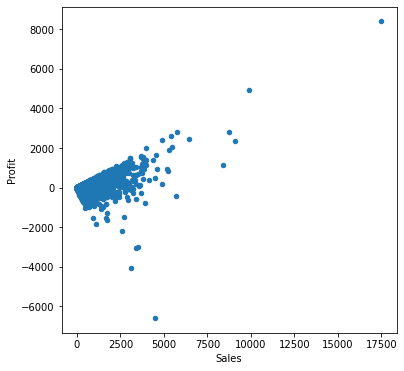

In [ ]:
sales.plot(kind='scatter', x='Sales', y='Profit', figsize=(6,6))

### (XII) Plot a grouped bar chart showing the total profit for the different product category for each market. 

In [ ]:
# Pivoted into sales
unused_columns = sales.columns.difference(set(['Market']).union(set(['Category'])).union(set({'Profit'})))
tmp_df = sales.drop(unused_columns, axis=1)
pivot_table = tmp_df.pivot_table(
    index=['Market'],
    columns=['Category'],
    values=['Profit'],
    aggfunc={'Profit': ['count']}
)
pivot_table.set_axis(['Profit Count Furniture', 'Profit Count Supplies', 'Profit Count Technology'], axis=1, inplace=True)
market_share = pivot_table.reset_index()

In [ ]:
market_share

,Market,Profit Count Furniture,Profit Count Supplies,Profit Count Technology
0,APAC,677,1588,625
1,Africa,181,855,258
2,Canada,10,75,21
3,EMEA,177,879,252
4,EU,410,1669,482
5,LATAM,705,1765,590
6,US,562,1560,458


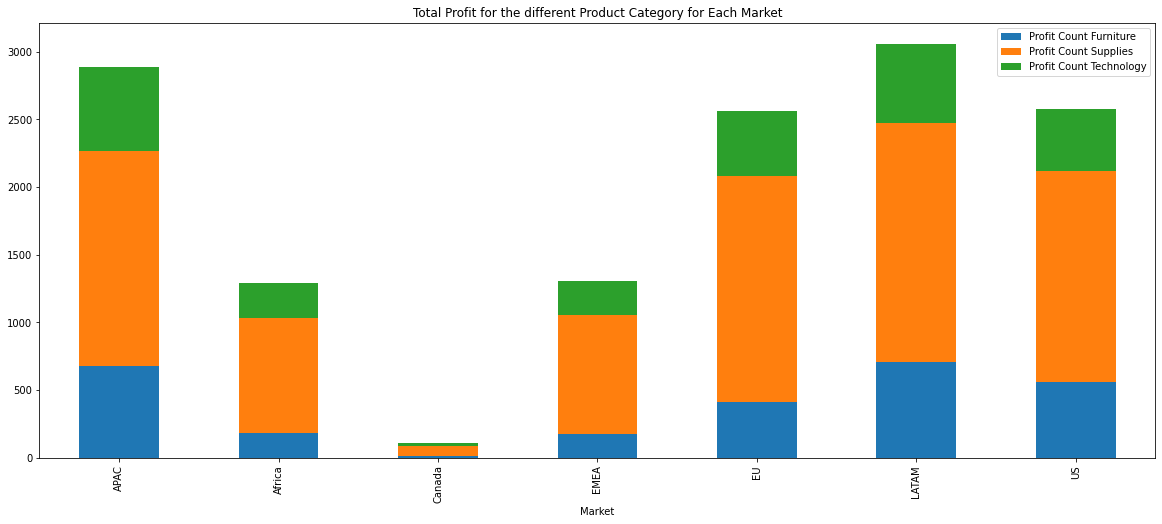

In [ ]:
# plot data in stack manner of bar type
market_share.plot(x='Market', kind='bar', stacked=True, title='Total Profit for the different Product Category for Each Market', figsize=(20,8));

### (XIII) From your graph, which product category performs well in each market?

* Supplies in the LATAM Market.
* Technology performs well in APAC market.
* Furniture Performs well in LATAM market.

i. Which customer spent the most in the whole year?

In [ ]:
# Data Frame Grouped by Highest Profit Per Month
best_cust = sales.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False)
best_cust.head(1)

,Sales,Quantity,Discount,Profit
Customer Name,,,,
Tamara Chand,23190.408,80,3.8,8536.4943


ii. What product does the customer in (i) buy the most?

In [ ]:
top_cust_prod = sales.groupby([sales['Customer Name']== 'Tamara Chand', 'Product Name'], as_index=False)['Sales'].sum()
top_cust_prod.sort_values(by='Sales', ascending=False)

,Product Name,Sales
2087,"Motorola Smart Phone, Full Size",29357.0982
838,"Cisco Smart Phone, Full Size",26737.1330
1493,"Harbour Creations Executive Leather Armchair, Adjustable",21871.1296
275,"Apple Smart Phone, Full Size",21120.4080
1599,"Hon Executive Leather Armchair, Adjustable",20104.6026
...,...,...
42,"Acco Banker's Clasps, 5 3/4""-Long",2.3040
2015,Maxell 4.7GB DVD+R 5/Pack,1.9800
361,Avery Durable Binders,1.7280
2230,"OIC #2 Pencils, Medium Soft",1.5040


Which month did the customer spent the most?

In [ ]:
top_cust_mon = sales.groupby([sales['Customer Name']== 'Tamara Chand', 'Months'], as_index=False)['Sales'].sum()
top_cust_mon.sort_values(by='Sales', ascending=False).head(1)

,Months,Sales
9,November,378881.24448


iv. How much did this customer spend in the whole year?

In [ ]:
customer_data = sales.groupby('Customer Name', as_index=False)['Sales'].sum()
customer_data = customer_data.sort_values(by='Sales', ascending=False)
customer_data.head(1)

,Customer Name,Sales
731,Tamara Chand,23190.408


Total Sales in a Month

Text(0, 0.5, 'Sales')

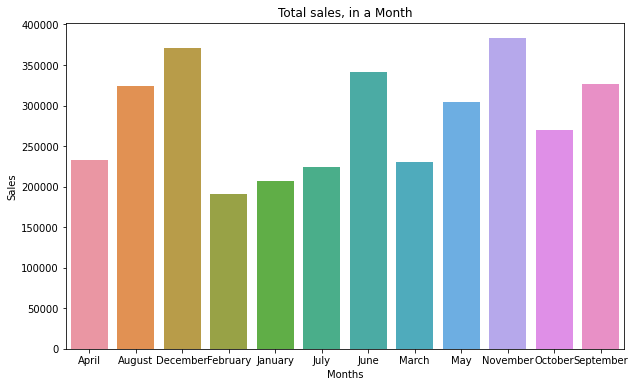

In [ ]:
best_month = sales.groupby('Months').sum()

# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Total sales, in a Month")

# Bar chart showing average sales in each month
sns.barplot(x=best_month.index, y=best_month.Sales)

plt.xlabel('Months')
plt.ylabel('Sales')

City with the Most Sales

In [ ]:
best_city = sales.groupby('City').sum()

best_city.index[best_city.Sales == best_city.Sales.max()]

Index(['Los Angeles'], dtype='object', name='City')

In [ ]:
best_city.Sales.max()

56398.748